In [ ]:
# update fastai library
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.text import *
from fastai.callbacks import *
import fastai; fastai.__version__

import pandas as pd
import re

In [ ]:
!pip install wandb
!wandb login 20983d37439737ea3e750cd826d32f9ed826c1dc

     |████████████████████████████████| 1.4MB 7.3MB/s 
     |████████████████████████████████| 102kB 11.6MB/s 
     |████████████████████████████████| 102kB 11.4MB/s 
     |████████████████████████████████| 163kB 43.9MB/s 
     |████████████████████████████████| 112kB 30.9MB/s 
     |████████████████████████████████| 71kB 9.2MB/s 
     |████████████████████████████████| 71kB 8.9MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp36-none-any.whl size=6489 sha256=b428b095603afa9f0dc9507cbb0b6e62efe0e418c705b2a6b2a510bc1896ad24
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
  Created wheel for watchdog: filename=watchdog-0.10.3-cp36-none-any.whl size=73870 sha256=559b8f547c538864afe7e7cad7eddc48aaddbea86060f50439a263574442d8e1
  Stored in directory: /root/.cache/pip/wheels/a8/1d/38/2c19bb311f67cc7b4d07a2ec5ea36ab1a0a0ea50db994a5bc7
  Created wheel for gql: filename=gql-0.2.0-cp36-none-any.whl size=7630 sha256=bf

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: 2
wandb: You chose 'Use an existing W&B account'
wandb: You can find your API key in your browser here: https://app.wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
Successfully logged in to Weights & Biases!


In [2]:
!nvidia-smi

Mon Jul 13 16:09:40 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
## Colab google drive stuff
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
file_name = 'data_fastai_all.txt'

In [ ]:
file_path = "/content/gdrive/My Drive/data/" + file_name

In [ ]:
df = pd.read_csv(file_path, sep="\n", header=None)
df

,0
0,start tempo128 [127] melody:v100:f#4 melody:v1...
1,start tempo91 [127] melody:v100:d3 melody:v100...
2,start tempo120 [127] melody:v100:e-4 melody:v1...
3,start tempo128 [127] melody:v100:b-5 accomp0:v...
4,start tempo97 [127] melody:v58:b-5 wait:256 me...
...,...
1987,start tempo128 [127] melody:v100:e2 melody:v10...
1988,start tempo120 [127] melody:v98:b-2 wait:512 m...
1989,start tempo128 [127] melody:v100:g2 accomp0:v1...
1990,start tempo128 [127] melody:v100:a3 melody:v10...


In [ ]:
split = int(len(df) * 0.9)
split

train = TextList(df[:split])
valid = TextList(df[split:])

In [ ]:
src = ItemLists(path=file_path, train=train, valid=valid).label_for_lm()

In [ ]:
src

LabelLists;

Train: LabelList (1792 items)
x: LMTextList
xxbos start tempo128 [ 127 ] melody : v100 : f # 4 melody : v100 : b-4 melody : v100 : c # 5 wait:4096 melody : v0 : f # 4 melody : v0 : b-4 melody : v0 : c # 5 melody : v100 : f5 melody : v100 : c # 5 melody : v100 : g # 4 wait:4096 [ 126 ] melody : v0 : f5 melody : v0 : c # 5 melody : v0 : g # 4 melody : v100 : c5 melody : v100 : e-4 melody : v100 : g # 4 wait:4096 [ 125 ] melody : v0 : c5 melody : v0 : e-4 melody : v0 : g # 4 melody : v100 : c # 5 melody : v100 : f4 melody : v100 : b-4 wait:4096 [ 124 ] melody : v0 : c # 5 melody : v0 : f4 melody : v0 : b-4 melody : v100 : f # 4 melody : v100 : b-4 melody : v100 : c # 5 wait:4096 [ 123 ] melody : v0 : f # 4 melody : v0 : b-4 melody : v0 : c # 5 melody : v100 : g # 4 melody : v100 : c # 5 melody : v100 : f5 wait:4096 [ 122 ] melody : v0 : g # 4 melody : v0 : c # 5 melody : v0 : f5 melody : v100 : g # 4 melody : v100 : e-4 melody : v100 : c5 wait:4096 [ 121 ] melody : v0 : g # 4

In [ ]:
# batch size
bs = 32
data = src.databunch(bs=bs)

In [ ]:
data.show_batch()

idx,text
0,v0 : f5 melody : v0 : c # 5 melody : v0 : g # 4 melody : v100 : c5 melody : v100 : e-4 melody : v100 : g # 4 wait:4096 [ 125 ] melody : v0 : c5 melody : v0 : e-4 melody : v0 : g # 4 melody : v100 : c # 5 melody : v100 : f4 melody : v100
1,melody : v0 : e-5 melody : v63 : e-5 wait:512 melody : v0 : e-5 melody : v63 : f # 5 wait:512 melody : v0 : f # 5 wait:512 melody : v63 : g # 5 wait:512 melody : v0 : g # 5 wait:1024 accomp0 : v0 : b-4 accomp0 : v0 : f # 4 accomp0 : v0 : e-4 accomp0 : v56 : b2
2,: f # 4 wait:512 melody : v0 : f # 3 melody : v0 : f # 2 melody : v0 : c # 3 melody : v100 : c # 3 melody : v100 : c # 2 melody : v100 : g # 2 melody : v100 : b-4 wait:256 melody : v0 : b-4 wait:256 melody : v100 : f # 4 wait:256 melody : v0
3,wait:512 melody : v0 : b5 melody : v100 : a5 accomp0 : v0 : a3 accomp0 : v0 : f # 3 accomp0 : v0 : c # 3 accomp0 : v100 : a3 accomp0 : v100 : c # 3 accomp0 : v100 : f # 3 wait:1024 melody : v0 : a5 melody : v100 : b5 accomp0 : v0 : a3 accomp0 : v0 : c
4,e3 accomp0 : v100 : a2 wait:256 melody : v0 : g6 melody : v0 : g5 wait:85 melody : v100 : a5 melody : v100 : a6 wait:427 melody : v100 : g5 melody : v100 : g6 wait:85 melody : v0 : a5 melody : v0 : a6 wait:171 melody : v0 : g5 melody : v0 : g6 accomp0 : v0 : a3 accomp0 : v0 :


###### Model

In [ ]:
import wandb
from wandb.fastai import WandbCallback
from functools import partial

In [ ]:
wandb.init(id="2n59cc50", resume="allow")

W&B Run: https://app.wandb.ai/tcinfinity/uncategorized/runs/2n59cc50

In [ ]:
wandb.init(group="fastai-transformerxl", name="13 jul")

W&B Run: https://app.wandb.ai/tcinfinity/uncategorized/runs/3jf9uuxq

In [ ]:
model = TransformerXL(vocab_sz=30000, ctx_len=10000, n_layers=18, n_heads=16, d_model=1024, d_head=64, d_inner=4096, mem_len=1600)

In [ ]:
learn = language_model_learner(data, TransformerXL, drop_mult=0.3, model_dir='/content/gdrive/My Drive/13train', callback_fns=WandbCallback)

In [ ]:
learn = language_model_learner(data, TransformerXL, drop_mult=0.3, model_dir='/content/gdrive/My Drive/13train')#, callback_fns=WandbCallback)

In [ ]:
learn.model_dir

'/train'

###### Frozen Training

In [ ]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)
# ignore torch.bool warnings

In [ ]:
warnings.resetwarnings()

In [ ]:
## run lr finder
learn.lr_find(num_it=200)

## plot lr finder
learn.recorder.plot(skip_end=60)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Find steepest gradient (point of fastest learning) \\
Or pick value a bit before minimum (here not applicable)

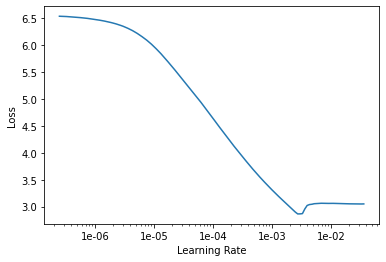

Test train one epoch frozen

In [ ]:
%cp -av /content/gdrive/My\ Drive/models/saved_11jul_7.pth /train/

'/content/gdrive/My Drive/models/saved_11jul_7.pth' -> '/train/saved_11jul_7.pth'


In [ ]:
from fastai.callbacks import SaveModelCallback
# Train with the callback function set to save weights every epoch
learn.fit_one_cycle(5, max_lr=slice(2e-3,2e-4), 
       callbacks=[SaveModelCallback(learn, every='epoch',  
                  monitor='accuracy', name='saved_13jul')])

epoch,train_loss,valid_loss,accuracy,time


In [ ]:
%cp -R /train/ /content/gdrive/My\ Drive/models/

In [ ]:
epoch = 20
lr = 3e-3

In [ ]:
# Start from previously saved epoch

from fastai.callbacks import SaveModelCallback
# Train with the callback function set to save weights every epoch
learn.fit_one_cycle(5, max_lr=slice(2e-5,4e-5), start_epoch=8,
       callbacks=[SaveModelCallback(learn, every='epoch',  
                  monitor='accuracy', name='saved_13jul')])

Loaded saved_11jul_7


epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: ignored

In [ ]:
# momentum(beta-1, beta-2)
epoch = 20
lr = 3e-3
learn.fit_one_cycle(epoch, lr)


epoch,train_loss,valid_loss,accuracy,time
0,0.182060,0.353880,0.902145,1:03:10
1,2.888200,2.913009,0.343895,1:03:24
2,2.930181,2.929250,0.343895,1:03:31
3,2.840376,2.957969,0.343895,1:03:28


Better model found at epoch 0 with valid_loss value: 0.3538801670074463.


In [ ]:
epoch = 4
lr = 2e-3

learn.fit_one_cycle(
    epoch, 
    lr, 
    moms=(0.8,0.7), 
    # callbacks=[
    #   ShowGraph(learn), 
    #   SaveModelCallback(learn, monitor="error_rate", mode="min", name="marker_8jul_1")
    # ]
)

epoch,train_loss,valid_loss,accuracy,time
0,2.922169,3.013517,0.299747,05:34
1,2.845032,3.071242,0.299747,05:33
2,2.888551,3.019430,0.299747,05:32
3,2.913337,3.016743,0.299747,05:33


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,8))

**Save and Download** \\
Load model with `learn = load_learner("...")`

In [ ]:
learn.export(file='/train/export.pkl')

In [ ]:
!cd ../train/

In [ ]:
from google.colab import files
files.download('/train/saved_11jul_7.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Save only trained weights (requires recreation of model before loading back weights with `learn.load()`)

In [ ]:
learn.save("trained_model", return_path=True)

PosixPath('/train/trained_model.pth')

In [ ]:
from google.colab import files
files.download('/train/trained_model.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###### Generate

In [ ]:
load_model_path = "/content/gdrive/My Drive/models/bestmodel_10jul"

In [ ]:
learn.load(load_model_path)

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (1792 items)
x: LMTextList
xxbos start tempo128 [ 127 ] melody : v100 : f # 4 melody : v100 : b-4 melody : v100 : c # 5 wait:4096 melody : v0 : f # 4 melody : v0 : b-4 melody : v0 : c # 5 melody : v100 : f5 melody : v100 : c # 5 melody : v100 : g # 4 wait:4096 [ 126 ] melody : v0 : f5 melody : v0 : c # 5 melody : v0 : g # 4 melody : v100 : c5 melody : v100 : e-4 melody : v100 : g # 4 wait:4096 [ 125 ] melody : v0 : c5 melody : v0 : e-4 melody : v0 : g # 4 melody : v100 : c # 5 melody : v100 : f4 melody : v100 : b-4 wait:4096 [ 124 ] melody : v0 : c # 5 melody : v0 : f4 melody : v0 : b-4 melody : v100 : f # 4 melody : v100 : b-4 melody : v100 : c # 5 wait:4096 [ 123 ] melody : v0 : f # 4 melody : v0 : b-4 melody : v0 : c # 5 melody : v100 : g # 4 melody : v100 : c # 5 melody : v100 : f5 wait:4096 [ 122 ] melody : v0 : g # 4 melody : v0 : c # 5 melody : v0 : f5 melody : v100 : g # 4 melody : v100 : e-4 melody : v100 : c5 wait:4096 [

In [ ]:
start_text = "start tempo120"
n_words = 10000

In [ ]:
text = learn.predict(start_text, n_words, temperature=0.75)
text

'start tempo120 [ 100 ] wait:256 melody : v0 : b-3 melody : v0 : f3 melody : v100 : f4 melody : v100 : b-3 melody : v100 : e-3 wait:512 melody : v0 : b-3 melody : v0 : e-3 wait:512 melody : v100 : e-4 melody : v100 : e-3 wait:512 melody : v0 : e-4 melody : v0 : e-3 melody : v100 : e-4 melody : v100 : e-3 melody : v100 : b-3 wait:512 [ 84 ] melody : v0 : e-4 melody : v0 : e-3 melody : v0 : b-3 melody : v100 : c4 melody : v100 : f3 melody : v100 : f4 wait:512 melody : v0 : c4 melody : v0 : f3 melody : v0 : f4 melody : v100 : e-3 melody : v100 : g3 melody : v100 : b-3 wait:256 melody : v0 : e-3 melody : v0 : g3 melody : v0 : b-3 melody : v100 : c4 melody : v100 : g3 melody : v100 : e-3 wait:256 melody : v0 : c4 melody : v0 : g3 melody : v0 : e-3 wait:256 melody : v100 : g # 3 melody : v100 : f3 melody : v100 : c4 melody : v100 : g # 2 wait:256 melody : v0 : g # 3 melody : v0 : f3 melody : v0 : c4 melody : v0 : g # 2 melody : v100 : g # 2 melody : v100 : e-3 melody : v100 : g # 3 melody : 

In [ ]:
## new rule
def add_spk(x:Collection[str]) -> Collection[str]:
  res = []
  for t in x:
    if t in participants: res.append('xxspk'); res.append(t)
    else: res.append(t)
    return res## add new rule to defaults and pass in customer processor
    
custom_post_rules = defaults.text_post_rules + [add_spk]
tokenizer = Tokenizer(post_rules = custom_post_rules)processor = [TokenizeProcessor(tokenizer=tokenizer), 
 NumericalizeProcessor(max_vocab=30000)]

In [ ]:
learn = text_classifier_learner(data_clas, TransformerXL, drop_mult=0.5)